In [153]:
import pandas as pd
import re

df_participacion_2023_1 = pd.read_csv("participacion/participacion_descripcion_2023_1.csv")
df_participacion_2023_2 = pd.read_csv("participacion/participacion_descripcion_2023_2.csv")
df_participacion_2024 = pd.read_csv("participacion/participacion_descripcion_2024.csv")
df_parlamentarios = pd.read_csv("participacion/parlamentarios_info_general.csv")



In [159]:
pip install huggingface_hub[hf_xet]

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: huggingface_hub[hf_xet] in c:\users\sebax\appdata\local\programs\python\python312\lib\site-packages (0.30.2)
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ----------------- ---------------------- 1.8/4.1 MB 8.4 MB/s eta 0:00:01
   --------------------------------- ------ 3.4/4.1 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 4.1/4.1 MB 8.5 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
pip install keybert


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
def limpiar_texto(txt):
    txt = re.sub(r'[\r\n]+', '', txt)
    txt = txt.lower()
    return txt.strip()

In [162]:
df_participacion_2023_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24050 entries, 0 to 24049
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_PARTICIPACION    24050 non-null  int64  
 1   PARLAMENTARIO_ID    24050 non-null  int64  
 2   FECHA               24050 non-null  object 
 3   LEGISLATURA         24050 non-null  int64  
 4   SESION              24050 non-null  int64  
 5   TIPO_SESION         24050 non-null  object 
 6   TIPO_PARTICIPACION  24050 non-null  object 
 7   CAMARA              24050 non-null  object 
 8   PARLAMENTARIOS      24050 non-null  object 
 9   TEXTO_PRINCIPAL     24050 non-null  object 
 10  TEXTO_ANTECEDENTE   12811 non-null  object 
 11  DESCRIPCION_DEBATE  24050 non-null  object 
 12  BOLETIN_ID          8892 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 2.4+ MB


In [163]:
df_participacion_2023_1.drop_duplicates()

,ID_PARTICIPACION,PARLAMENTARIO_ID,FECHA,LEGISLATURA,SESION,TIPO_SESION,TIPO_PARTICIPACION,CAMARA,PARLAMENTARIOS,TEXTO_PRINCIPAL,TEXTO_ANTECEDENTE,DESCRIPCION_DEBATE,BOLETIN_ID
0,391,3494,2023-06-19,371,31,Sesión parlamentaria especial,Intervención,Senado,[3494],"La señora ALLENDE.- \nGracias, Presidente. \nP...",El señor GUZMAN ( Secretario general ).- \nGra...,INQUIETUDES RELATIVAS A PLAN DE INVERSIONES EN...,NaN
1,392,3494,2023-06-19,371,32,Sesión parlamentaria extraordinaria,Intervención,Senado,[3494],"La señora ALLENDE.- \nGracias, Presidente. \nE...",NaN,CREACIÓN DE MINISTERIO DE SEGURIDAD PÚBLICA,NaN
2,393,3494,2023-06-14,371,30,Sesión parlamentaria ordinaria,Proyecto de Acuerdo,Senado,"[4513, 4577, 3494, 5196, 3735, 4591, 3099, 461...",-Proyecto de Acuerdo de los Honorables Senador...,NaN,-Proyecto de Acuerdo de los Honorables Senador...,NaN
3,394,3494,2023-06-13,371,29,Sesión parlamentaria ordinaria,Petición de oficio,Senado,[3494],De la señora ALLENDE:\n \n\n \n ...,NaN,PETICIONES DE OFICIOS,NaN
4,395,3494,2023-06-07,371,28,Sesión parlamentaria ordinaria,Proyecto de Acuerdo,Senado,"[2128, 4577, 3494, 5196, 3399, 3735, 4591, 309...",Proyecto de Acuerdo de los Honorables Senadore...,NaN,Proyecto de Acuerdo de los Honorables Senadore...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24045,243070,4622,2023-01-04,370,112,Sesión parlamentaria ordinaria,Intervención,Cámara de Diputados,[4622],El señor MIROSEVIC (Presidente).- \nTiene la...,NaN,CUENTA,NaN
24046,243071,4622,2023-01-03,370,111,Sesión parlamentaria ordinaria,Proyecto de Resolución,Cámara de Diputados,"[5239, 5261, 5264, 5219, 4583, 5190, 4602, 455...",El señor MIROSEVIC (Presidente).- \n \nCorresp...,NaN,ADOPCIÓN DE MEDIDAS PARA ELIMINACIÓN GRADUAL D...,NaN
24047,243072,4622,2023-01-03,370,112,Sesión parlamentaria ordinaria,Intervención en Comisión,Cámara de Diputados,[4622],La diputada Yeomans pregunta si depende totalm...,Tratado y acordado en la sesión ordinaria cele...,﻿INFORME DE LA COMISION DE HACIENDA RECAÍDO EN...,15625.0
24048,243073,4622,2023-01-03,370,112,Sesión parlamentaria ordinaria,Intervención en Comisión,Cámara de Diputados,[4622],La diputada Yeomans preguntó cómo se resolverá...,Tratado y acordado en la sesión especial celeb...,﻿INFORME DE LA COMISION DE HACIENDA RECAÍDO EN...,15511.0


In [164]:
print(str(df_participacion_2023_1[df_participacion_2023_1["ID_PARTICIPACION"] == 391]["TEXTO_PRINCIPAL"]))

0    La señora ALLENDE.- \nGracias, Presidente. \nP...
Name: TEXTO_PRINCIPAL, dtype: object


In [165]:
df_parlamentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PARLAMENTARIO_ID       1199 non-null   int64  
 1   NOMBRE_COMPLETO        1199 non-null   object 
 2   VIGENTE                1199 non-null   int64  
 3   FECHA_NACIMIENTO       206 non-null    object 
 4   REDES_SOCIALES         0 non-null      float64
 5   SITIOS_WEB             0 non-null      float64
 6   CAMARA_ACTUAL          206 non-null    object 
 7   CAMARA                 206 non-null    object 
 8   INICIO                 206 non-null    float64
 9   FINAL                  206 non-null    float64
 10  PARTIDO_POLITICO       155 non-null    object 
 11  UNIDAD_QUE_REPRESENTA  205 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 112.5+ KB


In [166]:
df_parlamentarios.drop_duplicates()

,PARLAMENTARIO_ID,NOMBRE_COMPLETO,VIGENTE,FECHA_NACIMIENTO,REDES_SOCIALES,SITIOS_WEB,CAMARA_ACTUAL,CAMARA,INICIO,FINAL,PARTIDO_POLITICO,UNIDAD_QUE_REPRESENTA
0,4611,Cristhian Moreira Barros,1,1961-09-05,NaN,NaN,C.Diputados,C. Diputados,2022.0,2026.0,Partido Unión Demócrata Independiente,13er Distrito
1,5209,Daniela Serrano Salazar,1,1995-03-17,NaN,NaN,C.Diputados,C. Diputados,2022.0,2026.0,Partido Comunista de Chile,12° Distrito
2,5194,Cristian Tapia Ramos,1,1968-07-14,NaN,NaN,C.Diputados,C. Diputados,2022.0,2026.0,NaN,4° Distrito
3,5203,Cristian Araya Lerdo De Tejada,1,1988-09-30,NaN,NaN,C.Diputados,C. Diputados,2022.0,2026.0,Partido Republicano de Chile,11° Distrito
4,4647,Cristian Labbe Martinez,1,1980-03-06,NaN,NaN,C.Diputados,C. Diputados,2022.0,2026.0,Unión Demócrata Independiente,8º Distrito
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2007,Hernan Modesto Olave Verdugo,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,278,Hernan Rojo Avendano,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,1185,Hernan Vodanovic Schnake,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197,205,Homero Gutierrez Roman,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que las columnas REDES_SOCIALES y SITIOS_WEB en especial no nos entregan nada de información sobre los parlamentarios, por lo que decido eliminar estas columnas

In [167]:
df_parlamentarios = df_parlamentarios[['PARLAMENTARIO_ID', 'NOMBRE_COMPLETO', 'VIGENTE', 'FECHA_NACIMIENTO', 'CAMARA_ACTUAL','CAMARA', 'INICIO','FINAL','PARTIDO_POLITICO','UNIDAD_QUE_REPRESENTA']]
df_parlamentarios

,PARLAMENTARIO_ID,NOMBRE_COMPLETO,VIGENTE,FECHA_NACIMIENTO,CAMARA_ACTUAL,CAMARA,INICIO,FINAL,PARTIDO_POLITICO,UNIDAD_QUE_REPRESENTA
0,4611,Cristhian Moreira Barros,1,1961-09-05,C.Diputados,C. Diputados,2022.0,2026.0,Partido Unión Demócrata Independiente,13er Distrito
1,5209,Daniela Serrano Salazar,1,1995-03-17,C.Diputados,C. Diputados,2022.0,2026.0,Partido Comunista de Chile,12° Distrito
2,5194,Cristian Tapia Ramos,1,1968-07-14,C.Diputados,C. Diputados,2022.0,2026.0,NaN,4° Distrito
3,5203,Cristian Araya Lerdo De Tejada,1,1988-09-30,C.Diputados,C. Diputados,2022.0,2026.0,Partido Republicano de Chile,11° Distrito
4,4647,Cristian Labbe Martinez,1,1980-03-06,C.Diputados,C. Diputados,2022.0,2026.0,Unión Demócrata Independiente,8º Distrito
...,...,...,...,...,...,...,...,...,...,...
1194,2007,Hernan Modesto Olave Verdugo,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,278,Hernan Rojo Avendano,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,1185,Hernan Vodanovic Schnake,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197,205,Homero Gutierrez Roman,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df_participacion_2023_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22240 entries, 0 to 22239
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_PARTICIPACION    22240 non-null  int64  
 1   PARLAMENTARIO_ID    22240 non-null  int64  
 2   FECHA               22240 non-null  object 
 3   LEGISLATURA         22240 non-null  int64  
 4   SESION              22240 non-null  int64  
 5   TIPO_SESION         22240 non-null  object 
 6   TIPO_PARTICIPACION  22240 non-null  object 
 7   CAMARA              22240 non-null  object 
 8   PARLAMENTARIOS      22240 non-null  object 
 9   TEXTO_PRINCIPAL     22240 non-null  object 
 10  TEXTO_ANTECEDENTE   10509 non-null  object 
 11  DESCRIPCION_DEBATE  22240 non-null  object 
 12  BOLETIN_ID          6393 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 2.2+ MB


In [169]:
df_participacion_2023_2.drop_duplicates()

,ID_PARTICIPACION,PARLAMENTARIO_ID,FECHA,LEGISLATURA,SESION,TIPO_SESION,TIPO_PARTICIPACION,CAMARA,PARLAMENTARIOS,TEXTO_PRINCIPAL,TEXTO_ANTECEDENTE,DESCRIPCION_DEBATE,BOLETIN_ID
0,217,3494,2023-12-22,371,89,Sesión parlamentaria ordinaria,Intervención en Comisión,Senado,[3494],"La indicación 14, del Presidente de la Repúbli...",Acordado en sesión celebrada el 18 de marzo de...,﻿INFORME DE LA COMISIÓN DE LA MUJER Y EQUIDAD ...,7567.0
1,218,3494,2023-12-22,371,89,Sesión parlamentaria ordinaria,Intervención en Comisión,Senado,[3494],La Senadora señora Allende consultó acerca de ...,Acordado en sesión celebrada el 18 de marzo de...,﻿INFORME DE LA COMISIÓN DE LA MUJER Y EQUIDAD ...,7567.0
2,219,3494,2023-12-22,371,89,Sesión parlamentaria ordinaria,Intervención en Comisión,Senado,[3494],La Senadora señora Allende consultó las razone...,Acordado en sesión celebrada el 18 de marzo de...,﻿INFORME DE LA COMISIÓN DE LA MUJER Y EQUIDAD ...,7567.0
3,220,3494,2023-12-22,371,89,Sesión parlamentaria ordinaria,Intervención en Comisión,Senado,[3494],La Senadora señora Allende consultó respecto d...,Acordado en sesión celebrada el 18 de marzo de...,﻿INFORME DE LA COMISIÓN DE LA MUJER Y EQUIDAD ...,7567.0
4,221,3494,2023-12-22,371,89,Sesión parlamentaria ordinaria,Intervención en Comisión,Senado,[3494],La Senadora señora Allende manifestó su discre...,Acordado en sesión celebrada el 18 de marzo de...,﻿INFORME DE LA COMISIÓN DE LA MUJER Y EQUIDAD ...,7567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22235,242973,4622,2023-07-25,371,56,Sesión parlamentaria ordinaria,Petición de oficio,Cámara de Diputados,[4622],"Diputada Yeomans, doña Gael . Mesa coordinador...",NaN,PETICIONES DE OFICIO. ARTÍCULOS 9° Y 9° A DE L...,NaN
22236,242974,4622,2023-07-24,371,55,Sesión parlamentaria ordinaria,Intervención,Cámara de Diputados,[4622],El señor CIFUENTES (Presidente).- \n Tiene la...,El señor CIFUENTES (Presidente).- \n Correspo...,PROHIBICIÓN DE CONDICIONAMIENTO DE RENDICIÓN D...,NaN
22237,242975,4622,2023-07-05,371,51,Sesión parlamentaria ordinaria,Integración,Cámara de Diputados,"[4565, 4604, 4560, 4564, 4559, 5190, 5224, 462...","Finalmente, propongo integrar la Comisión Espe...",NaN,INTEGRACIÓN DE COMISIONES ESPECIALES INVESTIGA...,NaN
22238,242976,4622,2023-07-04,371,50,Sesión parlamentaria especial,Mociones,Cámara de Diputados,"[4570, 4571, 5200, 3669, 1782, 4622, 4598, 4600]",Proyecto iniciado en moción de los diputados s...,NaN,Proyecto iniciado en moción de los diputados s...,NaN


In [170]:
df_participacion_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21871 entries, 0 to 21870
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_PARTICIPACION    21871 non-null  int64  
 1   PARLAMENTARIO_ID    21871 non-null  int64  
 2   FECHA               21871 non-null  object 
 3   LEGISLATURA         21871 non-null  int64  
 4   SESION              21871 non-null  int64  
 5   TIPO_SESION         21871 non-null  object 
 6   TIPO_PARTICIPACION  21871 non-null  object 
 7   CAMARA              21871 non-null  object 
 8   PARLAMENTARIOS      21871 non-null  object 
 9   TEXTO_PRINCIPAL     21871 non-null  object 
 10  TEXTO_ANTECEDENTE   9073 non-null   object 
 11  DESCRIPCION_DEBATE  21871 non-null  object 
 12  BOLETIN_ID          5308 non-null   float64
 13  largo               21871 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.3+ MB


In [171]:
df_participacion_2024.drop_duplicates()

,ID_PARTICIPACION,PARLAMENTARIO_ID,FECHA,LEGISLATURA,SESION,TIPO_SESION,TIPO_PARTICIPACION,CAMARA,PARLAMENTARIOS,TEXTO_PRINCIPAL,TEXTO_ANTECEDENTE,DESCRIPCION_DEBATE,BOLETIN_ID,largo
0,0,3494,2024-09-03,372,51,Sesión parlamentaria ordinaria,Intervención,Senado,[3494],"La señora ALLENDE.- \nGracias, Presidente. \nH...",El señor GARCÍA ( Presidente ).- \nEn el prime...,ACUERDO ENTRE CHILE Y ESTADOS UNIDOS DE AMÉRIC...,NaN,6491
1,1,3494,2024-09-03,372,51,Sesión parlamentaria ordinaria,Intervención,Senado,[3494],"La señora ALLENDE.- \nGracias, Presidente. \nC...",El señor GARCÍA ( Presidente ).- \nProyecto de...,REGLAS DE IGUALDAD DE GÉNERO PARA DESIGNACIÓN ...,NaN,5291
2,2,3494,2024-09-03,372,51,Sesión parlamentaria ordinaria,Intervención,Senado,[3494],"La señora ALLENDE.- \nGracias, Presidente. \nP...","El señor GARCÍA ( Presidente ).- \nProyecto, i...",IMPOSIBILIDAD DE ADJUDICACIÓN DE PROGRAMAS O I...,NaN,4424
3,3,3494,2024-09-03,372,51,Sesión parlamentaria ordinaria,Intervención,Senado,[3494],"La señora ALLENDE.- \nPresidente , yo le pedí ...",El señor GARCÍA ( Presidente ).- \nEn el prime...,ACUERDO ENTRE CHILE Y ESTADOS UNIDOS DE AMÉRIC...,NaN,1061
4,4,3494,2024-08-28,372,48,Sesión parlamentaria extraordinaria,Intervención,Senado,[3494],"La señora ALLENDE.- \nPresidente, como ha seña...",El señor GARCÍA ( Presidente ).- \nProyecto de...,MODIFICACIÓN DE CÓDIGO DE AGUAS EN LO RELATIVO...,NaN,5366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21866,242897,4622,2024-01-09,371,128,Sesión parlamentaria ordinaria,Solicitud de Resolución,Cámara de Diputados,"[5239, 5261, 5219, 5190, 4602, 4551, 4622, 524...",El señor CIFUENTES (Presidente).- \n \n Corres...,NaN,PREOCUPACIÓN POR AFECTACIÓN A PATRIMONIO MUNIC...,NaN,742
21867,242898,4622,2024-01-08,371,128,Sesión parlamentaria ordinaria,Intervención en Comisión,Cámara de Diputados,[4622],La Diputada Yeomans (Presidenta) reconoció la ...,Tratado y acordado en la sesión especial celeb...,﻿INFORME DE LA COMISION DE HACIENDA RECAÍDO EN...,16498.0,260
21868,242899,4622,2024-01-03,371,124,Sesión parlamentaria ordinaria,Petición de oficio,Cámara de Diputados,[4622],"-DiputadaYeomans , doña Gael . Acciones dest...",NaN,OTROS DOCUMENTOS DE LA CUENTA,NaN,324
21869,242900,4622,2024-01-03,371,124,Sesión parlamentaria ordinaria,Petición de oficio,Cámara de Diputados,[4622],"-DiputadaYeomans , doña Gael . Acciones dest...",NaN,OTROS DOCUMENTOS DE LA CUENTA,NaN,293


In [172]:
texto = [df_participacion_2024.loc[21870, 'TEXTO_PRINCIPAL']]
texto


['El señor CIFUENTES (Presidente).- \\n \\n Corresponde tratar el proyecto de resolución N° 904. \\nEl señor Prosecretario dará lectura a su parte dispositiva. \\n \\nEl señor ROJAS (Prosecretario).- \\n \\nProyecto de resolución N° 904, de las diputadas  Mercedes Bulnes ,   María Francisca Bello ,   Marcela Riquelme  y   Gael Yeomans , y el diputado  Gonzalo Winter , que en su parte dispositiva señala: \\nLa Cámara de Diputados solicita a su excelencia el Presidente de la República que presente un proyecto para modificar la ley Nº 19.496, dándole la facultad al Servicio Nacional del Consumidor para tramitar y resolver procedimientos sancionatorios y dictar normas e instrucciones de carácter general de naturaleza obligatoria. \\n']

In [173]:
def limpiar_texto(txt):
    txt = re.sub(r"\\n", " ", txt)
    txt = txt.lower()
    return txt.strip()

In [174]:
# Limpiamos los textos de cada columna texto por df
df_participacion_2024['TEXTO_PRINCIPAL'] = df_participacion_2024['TEXTO_PRINCIPAL'].apply(limpiar_texto)
df_participacion_2024['TEXTO_ANTECEDENTE'] = df_participacion_2024['TEXTO_PRINCIPAL'].apply(limpiar_texto)

df_participacion_2023_1['TEXTO_PRINCIPAL'] = df_participacion_2023_1['TEXTO_PRINCIPAL'].apply(limpiar_texto)
df_participacion_2023_1['TEXTO_ANTECEDENTE'] = df_participacion_2023_1['TEXTO_PRINCIPAL'].apply(limpiar_texto)

df_participacion_2023_2['TEXTO_PRINCIPAL'] = df_participacion_2023_2['TEXTO_PRINCIPAL'].apply(limpiar_texto)
df_participacion_2023_2['TEXTO_ANTECEDENTE'] = df_participacion_2023_2['TEXTO_PRINCIPAL'].apply(limpiar_texto)


<Axes: >

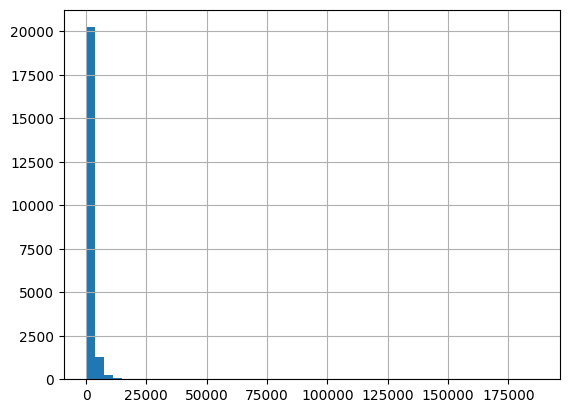

In [175]:
# Ahora elimino los datos que no sean significativos (en cuanto a largo) para la tarea

df_participacion_2024["largo"] = df_participacion_2024["TEXTO_PRINCIPAL"].apply(lambda x: len(x))
df_participacion_2024["largo"].hist(bins=50)


In [176]:
df_participacion_2024.shape

(21871, 14)

In [177]:
df_participacion_2024 = df_participacion_2024[df_participacion_2024["largo"] >= 50]
df_participacion_2024.shape

(21870, 14)

In [ ]:
# Ahora por cada df de participacion extraigo las keywords de su texto principal
from keybert import KeyBERT

kw_model = KeyBERT()

def get_keywords(text, top_n=3):
    # Devuelve lista de (keyword, score)
    keywords = kw_model.extract_keywords(text, top_n=top_n)
    return [k[0] for k in keywords]

df_participacion_2024["keywords"] = df_participacion_2024["TEXTO_PRINCIPAL"].apply(lambda x: get_keywords(x, top_n=3))
df_participacion_2024[["TEXTO_PRINCIPAL", "keywords"]].head()

In [ ]:
df_participacion_2024